In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Read csv file and place dataframe in df variable
df = pd.read_csv("stars.csv")

# Show dataframe
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [2]:
# Determine Star Color Types (Categorical Data)
df['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [3]:
# Determine Spectral Class Types (Categroical Data)
df['Spectral Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [4]:
# Clean up 'Star color' column

blueWhite = ['Blue White', 'Blue-white', 'Blue-White', 'Blue white ', 'Blue white'] # Blue-White Stars
yellowWhite = ['Yellowish White', 'White-Yellow', 'yellow-white'] # Yellow-White Stars
white = ['White', 'Whitish', 'white'] # White Stars
blue = ['Blue '] # Blue Stars
yellow = ['yellowish', 'Yellowish'] # Yellow Stars

df['Star color'] = df['Star color'].replace(blueWhite, 'Blue-White')
df['Star color'] = df['Star color'].replace(yellowWhite, 'Yellow-White')
df['Star color'] = df['Star color'].replace(white, 'White')
df['Star color'] = df['Star color'].replace(blue, 'Blue')
df['Star color'] = df['Star color'].replace(yellow, 'Yellow')

# After cleaning the data the most common star type is "Red"
df['Star color'].value_counts()

Red                   112
Blue                   56
Blue-White             41
White                  12
Yellow-White           12
Yellow                  3
Orange                  2
Pale yellow orange      1
Orange-Red              1
Name: Star color, dtype: int64

In [ ]:
df[df['Temperature'] == 5778 & df['Lu']

In [5]:
# Show dataframe again
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [6]:
# Use one-hot-encoding since 'Star color' and 'Spectral Class' are nominal categorical data
starColor = pd.get_dummies(df['Star color'])
spectClass = pd.get_dummies(df['Spectral Class'])

df = pd.concat([df, starColor, spectClass], axis='columns')

df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Blue,Blue-White,Orange,...,White,Yellow,Yellow-White,A,B,F,G,K,M,O
0,3068,0.002400,0.1700,16.12,0,Red,M,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,Red,M,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,Red,M,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,Red,M,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,Red,M,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O,1,0,0,...,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O,1,0,0,...,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,5,White,A,0,0,0,...,1,0,0,1,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,5,White,A,0,0,0,...,1,0,0,1,0,0,0,0,0,0


Text(0, 0.5, 'Frequency')

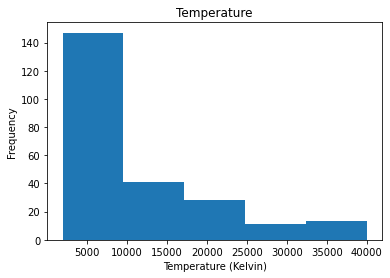

In [7]:
# Shows relationship between Temperature and Frequency
plt.hist(df['Temperature (K)'], bins=5)
plt.title('Temperature')
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

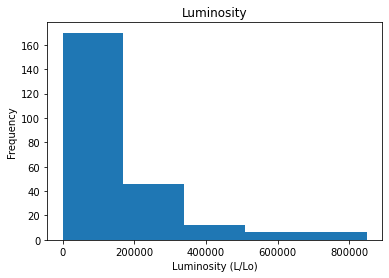

In [8]:
# Shows relationship between Luminosity and Frequency
plt.hist(df['Luminosity(L/Lo)'], bins=5)
plt.title('Luminosity')
plt.xlabel('Luminosity (L/Lo)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

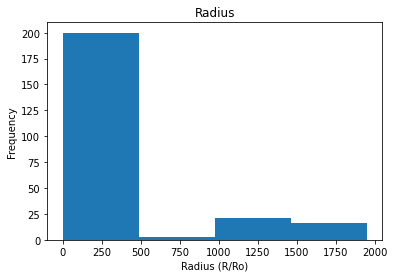

In [9]:
# Shows relationship between Radius and Frequency
plt.hist(df['Radius(R/Ro)'], bins=4)
plt.title('Radius')
plt.xlabel('Radius (R/Ro)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

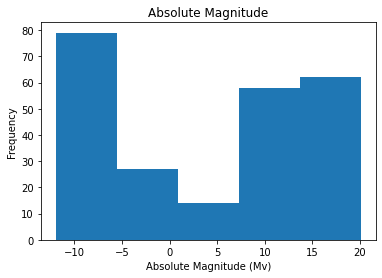

In [10]:
# Shows relationship between Absolute Magnitude and Frequency
plt.hist(df['Absolute magnitude(Mv)'], bins=5)
plt.title('Absolute Magnitude')
plt.xlabel('Absolute Magnitude (Mv)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

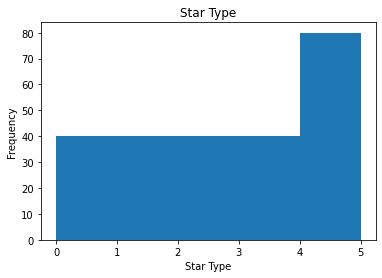

In [11]:
"""
Shows relationship between Absolute Magnitude and Frequency
Note that :
    Brown Dwarf -> Star Type = 0
    Red Dwarf -> Star Type = 1
    White Dwarf -> Star Type = 2
    Main Sequence -> Star Type = 3
    Supergiant -> Star Type = 4
    Hypergiant -> Star Type = 5
"""
plt.hist(df['Star type'], bins=5)
plt.title('Star Type')
plt.xlabel('Star Type')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

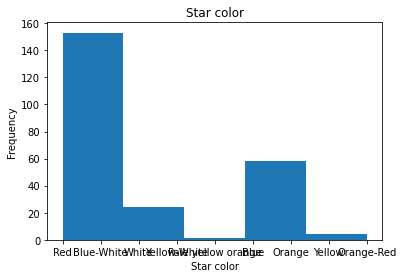

In [12]:
# Star Color is encoded using one hot encoding is used as well since the
# categorical variables are nominal
plt.hist(df['Star color'], bins=5)
plt.title('Star color')
plt.xlabel('Star color')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

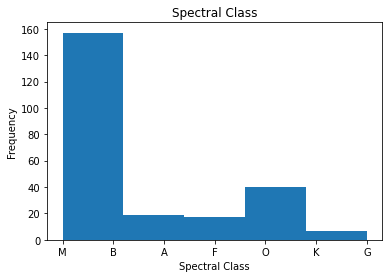

In [13]:
# Star Color is encoded using one hot encoding is used as well since the
# categorical variables are nominal
plt.hist(df['Spectral Class'], bins=5)
plt.title('Spectral Class')
plt.xlabel('Spectral Class')
plt.ylabel('Frequency')

In [14]:
# Show all columns that are available in dataframe
for col in df.columns:
    print(col)

Temperature (K)
Luminosity(L/Lo)
Radius(R/Ro)
Absolute magnitude(Mv)
Star type
Star color
Spectral Class
Blue
Blue-White
Orange
Orange-Red
Pale yellow orange
Red
White
Yellow
Yellow-White
A
B
F
G
K
M
O


In [15]:
x_columns = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)',
             'Blue', 'Blue-White', 'Orange', 'Orange-Red', 'Pale yellow orange', 'Red', 'White',
             'Yellow', 'Yellow-White']

inputs = df[x_columns] # Inputs
outputs = df['Star type'] # Outputs

# x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=0)

In [16]:
# Support Vector Machine
supportVector = SVC()
supportVector.fit(x_train, y_train)
y_pred = supportVector.predict(x_test)
supportVector.score(x_test, y_test)

0.3333333333333333

In [17]:
# Decision Tree
trees = tree.DecisionTreeClassifier()
trees.fit(x_train, y_train)
trees.predict(x_test)
trees.score(x_test, y_test)

1.0

In [18]:
# Random Forest
randForest = RandomForestClassifier()
randForest.fit(x_train, y_train)
randForest.predict(x_test)
randForest.score(x_test, y_test)

0.9791666666666666

In [19]:
# Build Pipeline to normalize data using MinMaxScaler() and initalize Mutlinomical Naive Biase to use for training
naiveBiase = Pipeline([('Normalizing', MinMaxScaler()), ('MultinomialNB', MultinomialNB())])

# Naive Biase
naiveBiase.fit(x_train, y_train)
naiveBiase.predict(x_test)
naiveBiase.score(x_test, y_test)

0.6666666666666666